# Loading the data and exploring its shape and values

This notebook is Part 2 of my analysis of the ECG Hearbeat dataset.  In this version I'll be focusing on building Deep Learning models compared to the original version which I tried to use "standard" machine leraning models to establish a baseline for whether its worth it to use Deep Learning or not.

The baseline version can be found [here](https://www.kaggle.com/basharalkuwaiti/ecg-heartbeat-categorization-baseline)

In [77]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.utils import resample

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heartbeat/ptbdb_abnormal.csv
/kaggle/input/heartbeat/ptbdb_normal.csv
/kaggle/input/heartbeat/mitbih_test.csv
/kaggle/input/heartbeat/mitbih_train.csv


In [78]:
mit_test = pd.read_csv('/kaggle/input/heartbeat/mitbih_test.csv',header=None)
mit_train = pd.read_csv('/kaggle/input/heartbeat/mitbih_train.csv', header=None)
ptb_abnormal = pd.read_csv('/kaggle/input/heartbeat/ptbdb_abnormal.csv', header=None)
ptb_normal = pd.read_csv('/kaggle/input/heartbeat/ptbdb_normal.csv', header=None)

In [79]:
mit_test.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
mit_train.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
ptb_abnormal.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.932233,0.869679,0.886186,0.929626,0.908775,0.933970,0.801043,0.749783,0.687229,0.635100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [82]:
ptb_normal.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
mit_test.rename(columns={187:"Class"}, inplace=True)
mit_train.rename(columns={187:"Class"}, inplace=True)
ptb_abnormal.rename(columns={187:"Class"}, inplace=True)
ptb_normal.rename(columns={187:"Class"}, inplace=True)

Looking at how many classes are there in each dataset
The MIT dataset has 5 clases:
* 0 = N  (Normal Beat)
* 1 = S  (Supraventricular premature beat)
* 2 = V  (Premature ventricular contraction)
* 3 = F  (Fusion of ventricular and normal beat)
* 4 = Q  (Unclassifiable beat)

Compared to the PTB dataset which is 1 for abnormal and 0 for normal


In [84]:
print ("MIT Train classes: \n", mit_train["Class"].value_counts())
print ("\nMIT Test classes: \n", mit_test["Class"].value_counts())
print ("\nPTB Abnormal classes: \n", ptb_abnormal["Class"].value_counts())
print ("\nPTB Normal classes: \n", ptb_normal["Class"].value_counts())

MIT Train classes: 
 0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: Class, dtype: int64

MIT Test classes: 
 0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: Class, dtype: int64

PTB Abnormal classes: 
 1.0    10506
Name: Class, dtype: int64

PTB Normal classes: 
 0.0    4046
Name: Class, dtype: int64


In [85]:
# Setting Dictionary to define the type of Heartbeat for both datasets
MIT_Outcome = {0. : 'Normal Beat',
               1. : 'Supraventricular premature beat',
               2. : 'Premature ventricular contraction',
               3. : 'Fusion of ventricular and normal beat',
               4. : 'Unclassifiable beat'}
PTB_Outcome = {0. : 'Normal',
               1. : 'Abnormal'}

# Generating Plots of some of the samples in the dataset

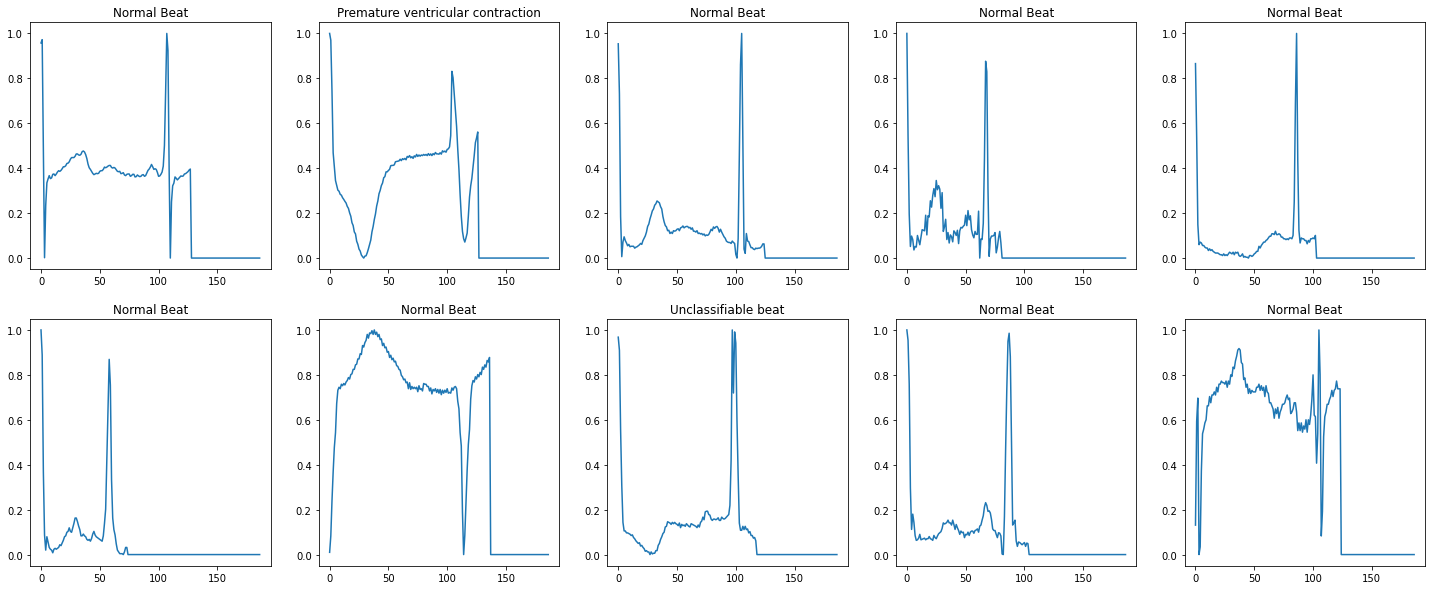

In [86]:
#Plotting 10 random samples from the MIT training dataset with their classification
plt.figure(figsize=(25,10))
np_count = np.linspace(0,186,187)
np_time = np.tile(np_count,(10,1))
rnd = np.random.randint(0,mit_train.shape[0],size=(10,))


for i in range(np_time.shape[0]):
    ax = plt.subplot(2,5,i+1)
    ax.plot(mit_train.iloc[rnd[i],np_time[i,:]])
    ax.set_title(MIT_Outcome[mit_train.loc[rnd[i],'Class']])

plt.show()


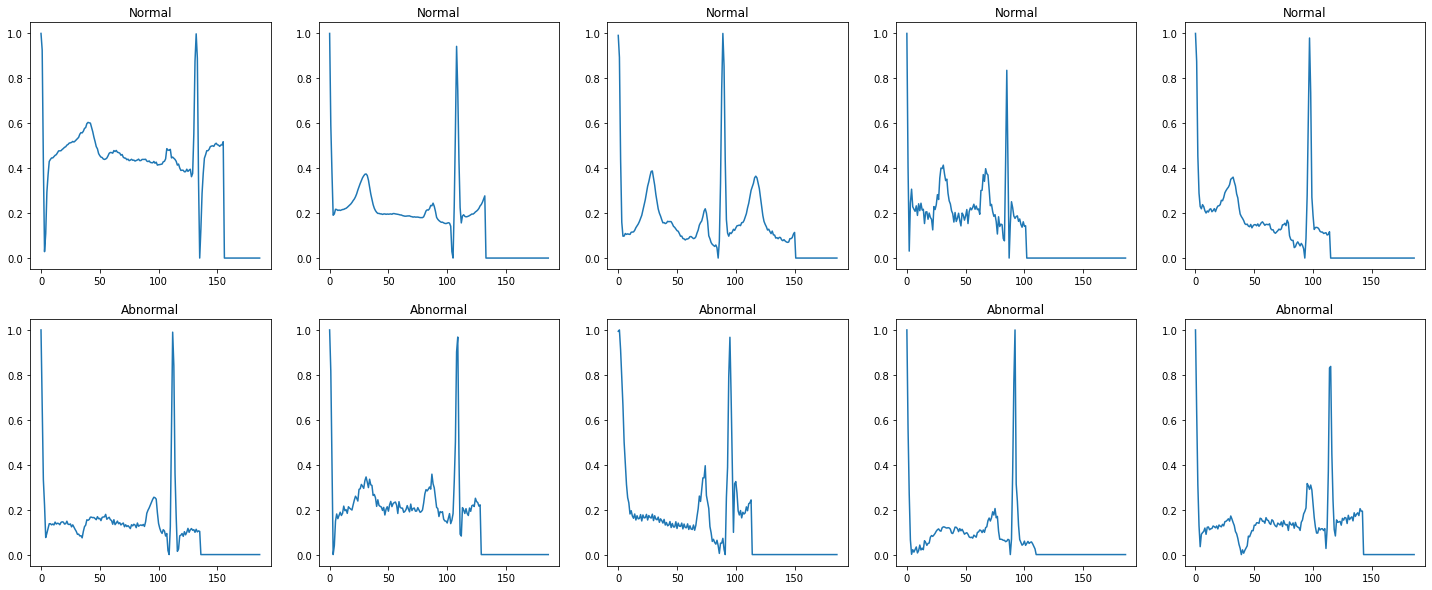

In [87]:
#Plotting 10 random samples from the PTB training dataset with their classification
plt.figure(figsize=(25,10))
rnd = np.random.randint(0,ptb_normal.shape[0],size=(5,))
rnd1 = np.random.randint(0,ptb_abnormal.shape[0], size=(5,))

for i in range(np_time.shape[0]):
    ax = plt.subplot(2,5,i+1)
    if (i < 5):
        ax.plot(ptb_normal.iloc[rnd[i],np_time[i,:]])
        ax.set_title(PTB_Outcome[ptb_normal.loc[rnd[i],'Class']])
    else:
        ax.plot(ptb_abnormal.iloc[rnd1[i-5],np_time[i,:]])
        ax.set_title(PTB_Outcome[ptb_abnormal.loc[rnd1[i-5],'Class']])

plt.show()

# Deep Learning Analysis

This is the where the notebooks are different.  Tha analysis above is similar to the [Baseline](https://www.kaggle.com/basharalkuwaiti/ecg-heartbeat-categorization-baseline) version

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import classification_report

import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras.layers import Dense, Conv1D, MaxPool1D, Flatten, Dropout, InputLayer, LSTM, GRU, BatchNormalization, Bidirectional, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.utils import to_categorical

In [89]:
#Preparing the training, validation and test sets for the PTB Data set
#ptb_abnormal = resample(ptb_abnormal,replace=True,n_samples=ptb_normal.shape[0],random_state=42)
ptb_full = pd.concat([ptb_normal, ptb_abnormal], axis=0).reset_index()
ptb_full.drop(columns='index', inplace=True)
ptb_full = ptb_full.sample(ptb_full.shape[0], random_state=42)
train_ptb, test_ptb, out_train_ptb, out_test_ptb = train_test_split(ptb_full.iloc[:,:187], ptb_full.iloc[:,-1], test_size=0.15, random_state=42)
train_ptb, valid_ptb, out_train_ptb, out_valid_ptb = train_test_split(train_ptb, out_train_ptb, test_size=0.2, random_state=42 )

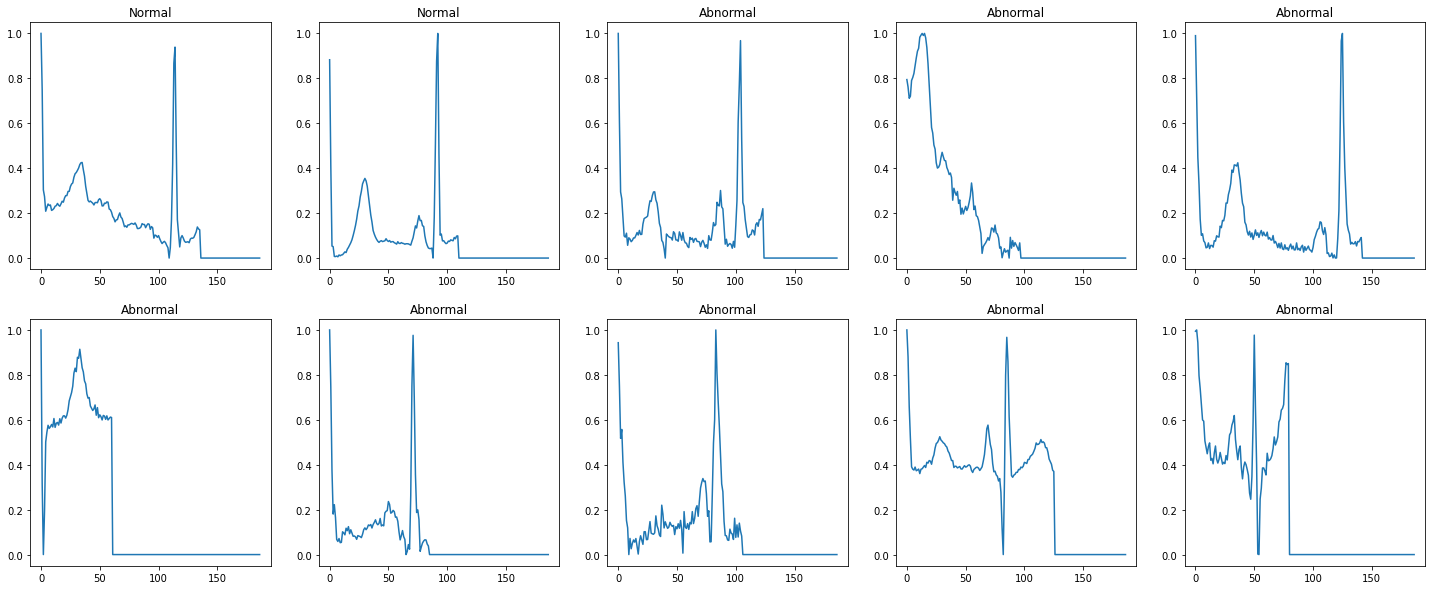

In [90]:
plt.figure(figsize=(25,10))
rnd = np.random.randint(0,train_ptb.shape[0],size=(10,))

for i in range(np_time.shape[0]):
    ax = plt.subplot(2,5,i+1)
    ax.plot(train_ptb.iloc[rnd[i],np_time[i,:]])
    ax.set_title(PTB_Outcome[out_train_ptb.iloc[rnd[i]]])

plt.show()

In [91]:
normal, abnormal = np.bincount(ptb_full.loc[:,'Class'])
norm_weight = (1/normal) * ((normal+abnormal)/2)
abnorm_weight = (1/abnormal) * ((normal+abnormal)/2)
class_weight = {0: norm_weight, 1: abnorm_weight}

In [92]:
print("Traing dataset size: ", train_ptb.shape)
print("Validation dataset size: ", valid_ptb.shape)
print("Test dataset size: ", test_ptb.shape)

Traing dataset size:  (9895, 187)
Validation dataset size:  (2474, 187)
Test dataset size:  (2183, 187)


In [93]:
#Normalizing the training & test data 
train_ptb = normalize(train_ptb, axis=0, norm='max')
valid_ptb = normalize(valid_ptb, axis=0, norm='max')
test_ptb = normalize(test_ptb, axis=0, norm='max')

In [94]:
max_length = 15
x_train_ptb = train_ptb.reshape(len(train_ptb),train_ptb.shape[1],1)
x_valid_ptb = valid_ptb.reshape(len(valid_ptb),valid_ptb.shape[1],1)
x_test_ptb = test_ptb.reshape(len(test_ptb),test_ptb.shape[1],1)
y_train_ptb = to_categorical(out_train_ptb)
y_valid_ptb = to_categorical(out_valid_ptb)
y_test_ptb = to_categorical(out_test_ptb)

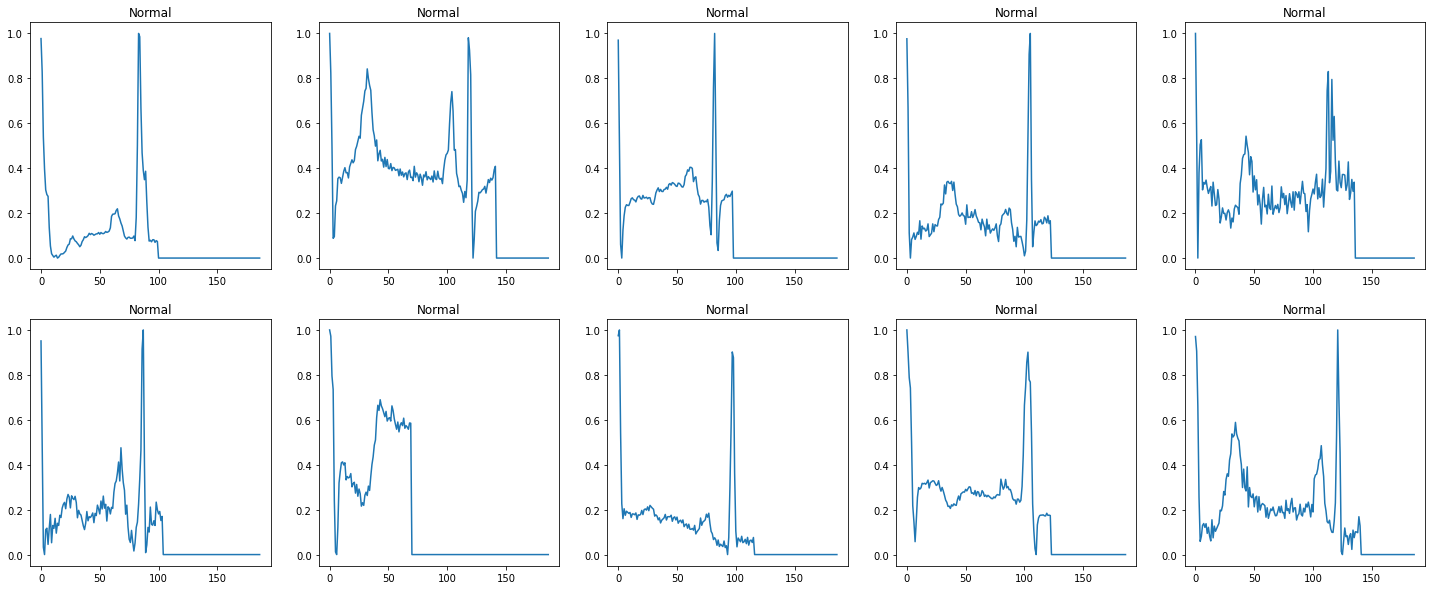

In [95]:
plt.figure(figsize=(25,10))
rnd = np.random.randint(0,x_train_ptb.shape[0],size=(10,))

for i in range(np_time.shape[0]):
    ax = plt.subplot(2,5,i+1)
    ax.plot(np_time[i,:], x_train_ptb[rnd[i],:,0])
    ax.set_title(PTB_Outcome[y_train_ptb[rnd[i],0]])

plt.show()

In [96]:
print("Traing dataset size: ", x_train_ptb.shape , " -- Y size: ", y_train_ptb.shape)
print("Validation dataset size: ", x_valid_ptb.shape , " -- Y size: ", y_valid_ptb.shape)
print("Test dataset size: ", x_test_ptb.shape , " -- Y size: ", y_test_ptb.shape)

Traing dataset size:  (9895, 187, 1)  -- Y size:  (9895, 2)
Validation dataset size:  (2474, 187, 1)  -- Y size:  (2474, 2)
Test dataset size:  (2183, 187, 1)  -- Y size:  (2183, 2)


In [97]:
tf.keras.backend.clear_session()

#Function to build Convolutional 1D Networks
def build_conv1d_model (input_shape=(x_train_ptb.shape[1],1)):
    model = keras.models.Sequential()
    
    model.add(Conv1D(32,7, padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(tf.keras.layers.ReLU())
    model.add(MaxPool1D(5,padding='same'))

    model.add(Conv1D(64,7, padding='same'))
    model.add(BatchNormalization())
    model.add(tf.keras.layers.ReLU())
    model.add(MaxPool1D(5,padding='same'))

    model.add(Conv1D(128,7, padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(tf.keras.layers.ReLU())
    model.add(MaxPool1D(5,padding='same'))

    model.add(Conv1D(256,7, padding='same'))
    model.add(BatchNormalization())
    model.add(tf.keras.layers.ReLU())
    model.add(MaxPool1D(5,padding='same'))

    model.add(Conv1D(512,7, padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(tf.keras.layers.ReLU())
    model.add(MaxPool1D(5,padding='same'))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(2, activation="softmax"))
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=[tfa.metrics.F1Score(2,"micro")])
    return model

In [98]:
checkpoint_cb = ModelCheckpoint("conv1d_ptb.h5", save_best_only=True)

earlystop_cb = EarlyStopping(patience=5, restore_best_weights=True)

model_conv1d_ptb= build_conv1d_model(input_shape=(x_train_ptb.shape[1], x_train_ptb.shape[2]))
model_conv1d_ptb.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 187, 32)           256       
_________________________________________________________________
batch_normalization (BatchNo (None, 187, 32)           128       
_________________________________________________________________
re_lu (ReLU)                 (None, 187, 32)           0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 38, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 38, 64)            14400     
_________________________________________________________________
batch_normalization_1 (Batch (None, 38, 64)            256       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 38, 64)            0

In [99]:
history_conv1d_ptb = model_conv1d_ptb.fit(x_train_ptb, y_train_ptb, epochs=40, batch_size=32, 
                                          class_weight=class_weight, validation_data=(x_valid_ptb, y_valid_ptb),  
                                          callbacks=[checkpoint_cb, earlystop_cb])

Epoch 1/40
310/310 [==============================] - 5s 11ms/step - loss: 0.4599 - f1_score: 0.7764 - val_loss: 1.8053 - val_f1_score: 0.7171
Epoch 2/40
310/310 [==============================] - 3s 9ms/step - loss: 0.2297 - f1_score: 0.9052 - val_loss: 0.2511 - val_f1_score: 0.8630
Epoch 3/40
310/310 [==============================] - 3s 9ms/step - loss: 0.1584 - f1_score: 0.9416 - val_loss: 0.2524 - val_f1_score: 0.8779
Epoch 4/40
310/310 [==============================] - 3s 9ms/step - loss: 0.1348 - f1_score: 0.9484 - val_loss: 0.1832 - val_f1_score: 0.9212
Epoch 5/40
310/310 [==============================] - 3s 9ms/step - loss: 0.1148 - f1_score: 0.9585 - val_loss: 0.4084 - val_f1_score: 0.8209
Epoch 6/40
310/310 [==============================] - 3s 8ms/step - loss: 0.1047 - f1_score: 0.9582 - val_loss: 0.1013 - val_f1_score: 0.9604
Epoch 7/40
310/310 [==============================] - 3s 8ms/step - loss: 0.1705 - f1_score: 0.9428 - val_loss: 0.2354 - val_f1_score: 0.9179
Epoch

In [100]:
model_conv1d_ptb.load_weights("conv1d_ptb.h5")
model_conv1d_ptb.evaluate(x_test_ptb,y_test_ptb)

69/69 [==============================] - 0s 3ms/step - loss: 0.0363 - f1_score: 0.9904


[0.03629658743739128, 0.9903802275657654]

In [101]:
conv1d_pred_proba_ptb = model_conv1d_ptb.predict (x_test_ptb)
conv1d_pred_ptb = np.argmax(conv1d_pred_proba_ptb, axis=1)

In [102]:
print(classification_report(out_test_ptb, conv1d_pred_ptb > 0.5, target_names=[PTB_Outcome[i] for i in PTB_Outcome]))

              precision    recall  f1-score   support

      Normal       0.99      0.98      0.98       616
    Abnormal       0.99      1.00      0.99      1567

    accuracy                           0.99      2183
   macro avg       0.99      0.99      0.99      2183
weighted avg       0.99      0.99      0.99      2183



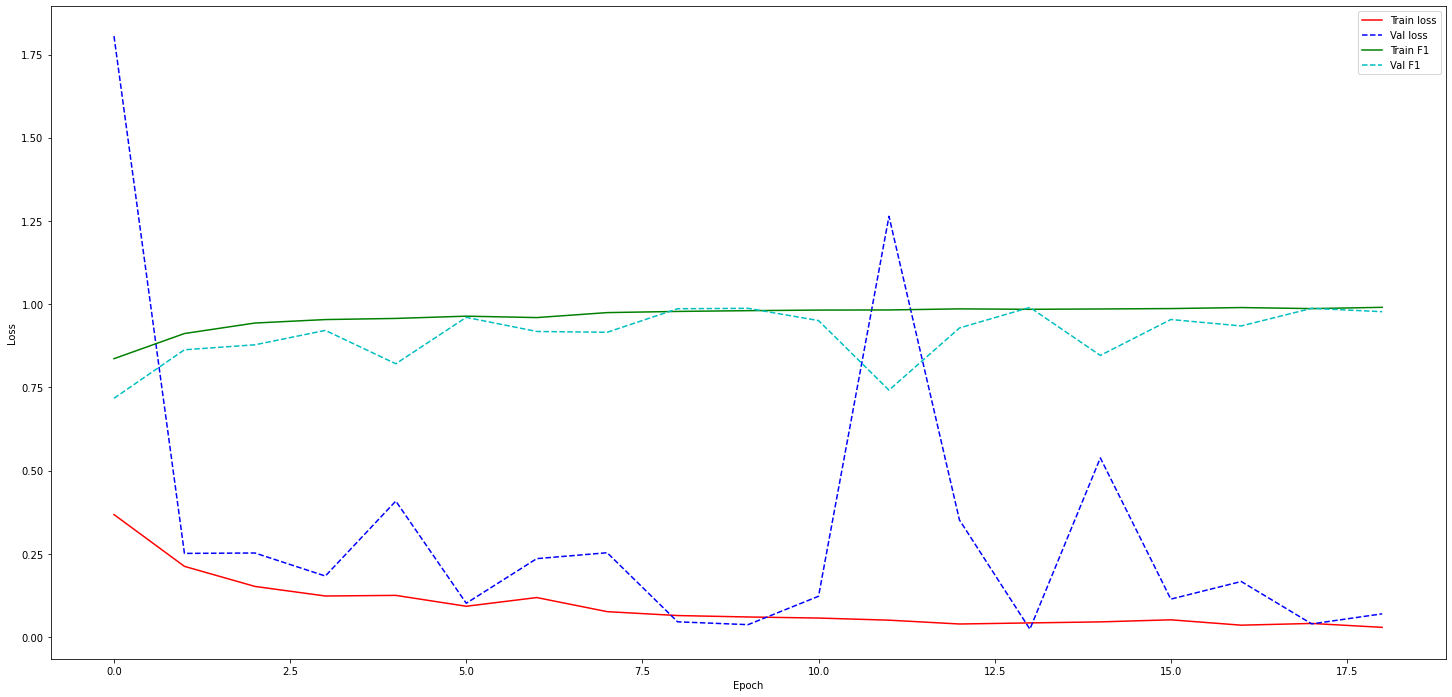

In [103]:
# Use a log scale on y-axis to show the wide range of values.
plt.figure(figsize=(25,12))
plt.plot(history_conv1d_ptb.epoch, history_conv1d_ptb.history['loss'],
           color='r', label='Train loss')
plt.plot(history_conv1d_ptb.epoch, history_conv1d_ptb.history['val_loss'],
           color='b', label='Val loss' , linestyle="--")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(history_conv1d_ptb.epoch, history_conv1d_ptb.history['f1_score'],
           color='g', label='Train F1')
plt.plot(history_conv1d_ptb.epoch, history_conv1d_ptb.history['val_f1_score'],
           color='c', label='Val F1' , linestyle="--")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [104]:
def build_conv1d_res_model (input_shape=(x_train_ptb.shape[1],1)):
    model = keras.models.Sequential()
    
    inp_shape = input_shape
    print(inp_shape)
    input_ = tf.keras.layers.Input (shape=(input_shape))
    
    print(input_.shape)
    
    conv1_1 = Conv1D(64,7, padding='same', input_shape=input_shape) (input_)
    conv1_1 = BatchNormalization() (conv1_1)
    conv1_1 = tf.keras.layers.ReLU() (conv1_1)
    #conv1_1 = MaxPool1D(5,padding='same') (conv1_1)
    print(conv1_1.shape)

    conv1_2 = Conv1D(64,7, padding='same') (conv1_1)
    conv1_2 = BatchNormalization() (conv1_2)
    conv1_2 = tf.keras.layers.ReLU() (conv1_2)
    #conv1_2 = MaxPool1D(5,padding='same') (conv1_2)
    print(conv1_2.shape)
    
    conv1_3 = Conv1D(64,7, padding='same') (conv1_2)
    conv1_3 = BatchNormalization() (conv1_3)
    conv1_3 = tf.keras.layers.ReLU() (conv1_3)
    #conv1_3 = MaxPool1D(5,padding='same') (conv1_3)
    print(conv1_3.shape)

    concat_1 = Concatenate()([conv1_1 , conv1_3 ])
    max_1 = MaxPool1D(5, padding="same") (concat_1)
    print(max_1.shape)
    
    conv1_4 = Conv1D(128,7, padding='same') (max_1)
    conv1_4 = BatchNormalization() (conv1_4)
    conv1_4 = tf.keras.layers.ReLU() (conv1_4)
    #conv1_4 = MaxPool1D(5,padding='same') (conv1_4)

    conv1_5 = Conv1D(128,7, padding='same', input_shape=input_shape) (conv1_4)
    conv1_5 = BatchNormalization() (conv1_5)
    conv1_5 = tf.keras.layers.ReLU() (conv1_5)
    #conv1_5 = MaxPool1D(5,padding='same') (conv1_5)
    
    conv1_6 = Conv1D(128,7, padding='same', input_shape=input_shape) (conv1_5)
    conv1_6 = BatchNormalization() (conv1_6)
    conv1_6 = tf.keras.layers.ReLU() (conv1_6)
    #conv1_6 = MaxPool1D(5,padding='same') (conv1_6)

    concat_2 = Concatenate()([conv1_4, conv1_6])
    max_2 = MaxPool1D(5, padding="same") (concat_2)

    flat = Flatten() (max_2)
    dense_1 = Dense(512, activation='relu') (flat)
    drop_1 = Dropout(0.5) (dense_1)
    dense_2 = Dense(256, activation='relu') (drop_1)
    drop_2 = Dropout(0.5) (dense_2)
    dense_3 = Dense(128, activation='relu') (drop_2)
    dense_4 = Dense(64, activation='relu') (dense_3)
    dense_5 = Dense(32, activation='relu') (dense_4)
    print(dense_5.shape)
    dense_6 = Dense(2, activation="softmax") (dense_5)
    print(dense_6.shape)
    
    model = Model (inputs=input_ , outputs=dense_6)
    
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=[tfa.metrics.F1Score(2,"micro")])
    return model

In [105]:
checkpoint_cb = ModelCheckpoint("conv1d_res_ptb.h5", save_best_only=True)

earlystop_cb = EarlyStopping(patience=5, restore_best_weights=True)

inp_shape = (x_train_ptb.shape[1], x_train_ptb.shape[2])
model_conv1d_res_ptb= build_conv1d_res_model(input_shape=(x_train_ptb.shape[1], x_train_ptb.shape[2]))
#model_conv1d_res_ptb.build(inp_shape)

(187, 1)
(None, 187, 1)
(None, 187, 64)
(None, 187, 64)
(None, 187, 64)
(None, 38, 128)
(None, 32)
(None, 2)


In [ ]:
history_conv1d_res_ptb = model_conv1d_res_ptb.fit(x_train_ptb, y_train_ptb, epochs=40, batch_size=32, 
                                          class_weight=class_weight, validation_data=(x_valid_ptb, y_valid_ptb),  
                                          callbacks=[checkpoint_cb, earlystop_cb])

Epoch 1/40
310/310 [==============================] - 6s 10ms/step - loss: 0.6822 - f1_score: 0.6427 - val_loss: 0.6933 - val_f1_score: 0.5679
Epoch 2/40
310/310 [==============================] - 3s 9ms/step - loss: 0.2894 - f1_score: 0.8965 - val_loss: 0.5458 - val_f1_score: 0.7736
Epoch 3/40
310/310 [==============================] - 3s 9ms/step - loss: 0.1532 - f1_score: 0.9499 - val_loss: 0.1555 - val_f1_score: 0.9305
Epoch 4/40
310/310 [==============================] - 3s 10ms/step - loss: 0.0991 - f1_score: 0.9652 - val_loss: 0.0912 - val_f1_score: 0.9551
Epoch 5/40
310/310 [==============================] - 3s 9ms/step - loss: 0.0822 - f1_score: 0.9750 - val_loss: 0.0523 - val_f1_score: 0.9786
Epoch 6/40
310/310 [==============================] - 3s 9ms/step - loss: 0.0653 - f1_score: 0.9784 - val_loss: 0.1091 - val_f1_score: 0.9584
Epoch 7/40
310/310 [==============================] - 3s 10ms/step - loss: 0.0542 - f1_score: 0.9798 - val_loss: 0.1666 - val_f1_score: 0.9369
Epo

In [ ]:
model_conv1d_res_ptb.load_weights("conv1d_res_ptb.h5")
model_conv1d_res_ptb.evaluate(x_test_ptb,y_test_ptb)

In [ ]:
conv1d_res_pred_proba_ptb = model_conv1d_res_ptb.predict (x_test_ptb)
conv1d_res_pred_ptb = np.argmax(conv1d_res_pred_proba_ptb, axis=1)

In [ ]:
print(classification_report(out_test_ptb, conv1d_res_pred_ptb > 0.5, target_names=[PTB_Outcome[i] for i in PTB_Outcome]))

In [ ]:
# Use a log scale on y-axis to show the wide range of values.
plt.figure(figsize=(25,12))
plt.plot(history_conv1d_res_ptb.epoch, history_conv1d_res_ptb.history['loss'],
           color='r', label='Train loss')
plt.plot(history_conv1d_res_ptb.epoch, history_conv1d_res_ptb.history['val_loss'],
           color='b', label='Val loss' , linestyle="--")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(history_conv1d_res_ptb.epoch, history_conv1d_res_ptb.history['f1_score'],
           color='g', label='Train F1')
plt.plot(history_conv1d_res_ptb.epoch, history_conv1d_res_ptb.history['val_f1_score'],
           color='c', label='Val F1' , linestyle="--")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# MIT Dataset Analysis

In [ ]:
# Since the MIT dataset already comes as a train set and test set, we just split 20% of the training set for validation
train_mit, valid_mit, out_train_mit, out_valid_mit = train_test_split(mit_train.iloc[:,:187], mit_train.iloc[:,-1], test_size=0.20, random_state=42)

#we remove the targets from the test set
test_mit, out_test_mit = mit_test.iloc[:,:187], mit_test.iloc[:,-1]

#Normalizing the training & test data 
train_mit = normalize(train_mit, axis=0, norm='max')
valid_mit = normalize(valid_mit, axis=0, norm='max')
test_mit = normalize(test_mit, axis=0, norm='max')

In [ ]:
x_train_mit = train_mit.reshape(len(train_mit),train_mit.shape[1],1)
x_valid_mit = valid_mit.reshape(len(valid_mit),valid_mit.shape[1],1)
x_test_mit = test_mit.reshape(len(test_mit),test_mit.shape[1],1)
y_train_mit = to_categorical(out_train_mit)
y_valid_mit = to_categorical(out_valid_mit)
y_test_mit = to_categorical(out_test_mit)

In [ ]:
print("Traing dataset size: ", x_train_mit.shape , " -- Y size: ", y_train_mit.shape)
print("Validation dataset size: ", x_valid_mit.shape , " -- Y size: ", y_valid_mit.shape)
print("Test dataset size: ", x_test_mit.shape , " -- Y size: ", y_test_mit.shape)

In [ ]:
# Calculating the class weights to feed into the model
normalmit, superpre, prevent, fusion, unclass = np.bincount(mit_train.loc[:,'Class'])
total_rec = len(mit_train)
normmit_weight = (1/normalmit) * (total_rec/5)
superpre_weight = (1/superpre) * (total_rec/5)
prevent_weight = (1/prevent) * (total_rec/5)
fusion_weight =  (1/fusion) * (total_rec/5)
unclass_weight = (1/unclass) * (total_rec/5)
class_weight_mit = {0: normmit_weight, 1: superpre_weight, 2: prevent_weight,
               3: fusion_weight, 4: unclass_weight}

In [ ]:
class_weight_mit

In [ ]:
tf.keras.backend.clear_session()

#Function to build Convolutional 1D Networks
def build_conv1d_model_mit (input_shape=(x_train_mit.shape[1],1)):
    model = keras.models.Sequential()
    
    model.add(Conv1D(32,7, padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(tf.keras.layers.ReLU())
    model.add(MaxPool1D(5,padding='same'))

    model.add(Conv1D(64,7, padding='same'))
    model.add(BatchNormalization())
    model.add(tf.keras.layers.ReLU())
    model.add(MaxPool1D(5,padding='same'))

    model.add(Conv1D(128,7, padding='same'))
    model.add(BatchNormalization())
    model.add(tf.keras.layers.ReLU())
    model.add(MaxPool1D(5,padding='same'))

    model.add(Conv1D(256,7, padding='same'))
    model.add(BatchNormalization())
    model.add(tf.keras.layers.ReLU())
    model.add(MaxPool1D(5,padding='same'))

    model.add(Conv1D(512,7, padding='same'))
    model.add(BatchNormalization())
    model.add(tf.keras.layers.ReLU())
    model.add(MaxPool1D(5,padding='same'))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(5, activation="softmax"))
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=[tfa.metrics.F1Score(5,"micro")])
    return model

In [ ]:
checkpoint_cb = ModelCheckpoint("conv1d_mit.h5", save_best_only=True)

earlystop_cb = EarlyStopping(patience=5, restore_best_weights=True)

model_conv1d_mit= build_conv1d_model_mit(input_shape=(x_train_mit.shape[1], x_train_mit.shape[2]))
model_conv1d_mit.summary()

In [ ]:
history_conv1d_mit = model_conv1d_mit.fit(x_train_mit, y_train_mit, epochs=40, batch_size=32, 
                             class_weight=class_weight_mit, validation_data=(x_valid_mit, y_valid_mit),  
                             callbacks=[checkpoint_cb, earlystop_cb])


In [ ]:
model_conv1d_mit.load_weights("conv1d_mit.h5")
model_conv1d_mit.evaluate(x_test_mit, y_test_mit)
conv1d_pred_mit_proba = model_conv1d_mit.predict (x_test_mit)
conv1d_pred_mit = np.argmax(conv1d_pred_mit_proba,axis=1)

In [ ]:
print(classification_report(out_test_mit, conv1d_pred_mit, target_names=[MIT_Outcome[i] for i in MIT_Outcome]))

In [ ]:
# Use a log scale on y-axis to show the wide range of values.
plt.figure(figsize=(25,12))
plt.plot(history_conv1d_mit.epoch, history_conv1d_mit.history['loss'],
           color='r', label='Train loss')
plt.plot(history_conv1d_mit.epoch, history_conv1d_mit.history['val_loss'],
           color='b', label='Val loss' , linestyle="--")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(history_conv1d_mit.epoch, history_conv1d_mit.history['f1_score'],
           color='g', label='Train F1')
plt.plot(history_conv1d_mit.epoch, history_conv1d_mit.history['val_f1_score'],
           color='c', label='Val F1' , linestyle="--")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
def build_conv1d_res_model_mit (input_shape=(x_train_mit.shape[1],1)):
    model = keras.models.Sequential()
    
    input_ = tf.keras.layers.Input (shape=(input_shape))
        
    conv1_1 = Conv1D(64,7, padding='same', input_shape=input_shape) (input_)
    conv1_1 = BatchNormalization() (conv1_1)
    conv1_1 = tf.keras.layers.ReLU() (conv1_1)

    conv1_2 = Conv1D(64,7, padding='same') (conv1_1)
    conv1_2 = BatchNormalization() (conv1_2)
    conv1_2 = tf.keras.layers.ReLU() (conv1_2)
    
    conv1_3 = Conv1D(64,7, padding='same') (conv1_2)
    conv1_3 = BatchNormalization() (conv1_3)
    conv1_3 = tf.keras.layers.ReLU() (conv1_3)

    concat_1 = Concatenate()([conv1_1 , conv1_3 ])
    max_1 = MaxPool1D(5, padding="same") (concat_1)
    
    conv1_4 = Conv1D(128,7, padding='same') (max_1)
    conv1_4 = BatchNormalization() (conv1_4)
    conv1_4 = tf.keras.layers.ReLU() (conv1_4)

    conv1_5 = Conv1D(128,7, padding='same', input_shape=input_shape) (conv1_4)
    conv1_5 = BatchNormalization() (conv1_5)
    conv1_5 = tf.keras.layers.ReLU() (conv1_5)
    
    conv1_6 = Conv1D(128,7, padding='same', input_shape=input_shape) (conv1_5)
    conv1_6 = BatchNormalization() (conv1_6)
    conv1_6 = tf.keras.layers.ReLU() (conv1_6)

    concat_2 = Concatenate()([conv1_4, conv1_6])
    max_2 = MaxPool1D(5, padding="same") (concat_2)

    flat = Flatten() (max_2)
    dense_1 = Dense(512, activation='relu') (flat)
    drop_1 = Dropout(0.5) (dense_1)
    dense_2 = Dense(256, activation='relu') (drop_1)
    drop_2 = Dropout(0.5) (dense_2)
    dense_3 = Dense(128, activation='relu') (drop_2)
    dense_4 = Dense(64, activation='relu') (dense_3)
    dense_5 = Dense(32, activation='relu') (dense_4)
    dense_6 = Dense(5, activation="softmax") (dense_5)
    
    model = Model (inputs=input_ , outputs=dense_6)
    
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=[tfa.metrics.F1Score(2,"micro")])
    return model

In [ ]:
checkpoint_cb = ModelCheckpoint("conv1d_res_mit.h5", save_best_only=True)

earlystop_cb = EarlyStopping(patience=5, restore_best_weights=True)

model_conv1d_res_mit= build_conv1d_res_model_mit(input_shape=(x_train_mit.shape[1], x_train_mit.shape[2]))

In [ ]:
history_conv1d_res_mit = model_conv1d_res_mit.fit(x_train_mit, y_train_mit, epochs=40, batch_size=32, 
                             class_weight=class_weight_mit, validation_data=(x_valid_mit, y_valid_mit),  
                             callbacks=[checkpoint_cb, earlystop_cb])

In [ ]:
model_conv1d_res_mit.load_weights("conv1d_mit.h5")
model_conv1d_res_mit.evaluate(x_test_mit, y_test_mit)
conv1d_res_pred_mit_proba = model_conv1d_res_mit.predict (x_test_mit)
conv1d_res_pred_mit = np.argmax(conv1d_res_pred_mit_proba,axis=1)

In [ ]:
print(classification_report(out_test_mit, conv1d_pred_mit, target_names=[MIT_Outcome[i] for i in MIT_Outcome]))

In [ ]:
# Use a log scale on y-axis to show the wide range of values.
plt.figure(figsize=(25,12))
plt.plot(history_conv1d_res_mit.epoch, history_conv1d_res_mit.history['loss'],
           color='r', label='Train loss')
plt.plot(history_conv1d_res_mit.epoch, history_conv1d_res_mit.history['val_loss'],
           color='b', label='Val loss' , linestyle="--")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(history_conv1d_res_mit.epoch, history_conv1d_res_mit.history['f1_score'],
           color='g', label='Train F1')
plt.plot(history_conv1d_res_mit.epoch, history_conv1d_res_mit.history['val_f1_score'],
           color='c', label='Val F1' , linestyle="--")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()